In [27]:
import pandas as pd

# Load the cleaned and processed smartwatch dataset
df = pd.read_csv("/Users/rutujashingate/Desktop/sleep-ml-project/data/processed/clean_smartwatch.csv")

print("Shape:", df.shape)
df.head()


Shape: (20000, 45)


,user_id,date_recorded,sleep_start_timestamp,sleep_end_timestamp,duration_minutes,sleep_latency_minutes,wake_after_sleep_onset_minutes,sleep_efficiency,sleep_score_raw,sleep_stage_deep_pct,...,device_model,bedtime_consistency_std_min,stress_score,activity_before_bed_min,screen_time_before_bed_min,insomnia_flag,apnea_risk_score,nap_duration_minutes,sleep_start_hour,sleep_day
0,user_00332,2024-04-03,2024-04-03 22:36:00,2024-04-04 06:01:00,445,2,15,0.962,59,0.156,...,AlphaWatch X1,37.1,33,39,87,0,24,10,22,2
1,user_00677,2018-12-05,2018-12-05 23:41:00,2018-12-06 04:36:00,295,18,1,0.936,61,0.206,...,AlphaWatch X1,9.6,20,1,0,0,15,9,23,2
2,user_01815,2025-03-30,2025-03-30 23:41:00,2025-03-31 06:56:00,435,6,50,0.871,58,0.200,...,PulsePro 3,35.5,29,5,37,0,33,0,23,6
3,user_00488,2023-05-11,2023-05-11 22:24:00,2023-05-12 06:10:00,466,10,12,0.953,53,0.133,...,WristFit Z,65.4,41,69,71,0,8,3,22,3
4,user_00498,2019-12-11,2019-12-11 22:17:00,2019-12-12 04:29:00,372,1,2,0.992,60,0.220,...,WristFit Z,0.4,54,49,31,0,26,5,22,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         20000 non-null  object 
 1   date_recorded                   20000 non-null  object 
 2   sleep_start_timestamp           20000 non-null  object 
 3   sleep_end_timestamp             20000 non-null  object 
 4   duration_minutes                20000 non-null  int64  
 5   sleep_latency_minutes           20000 non-null  int64  
 6   wake_after_sleep_onset_minutes  20000 non-null  int64  
 7   sleep_efficiency                20000 non-null  float64
 8   sleep_score_raw                 20000 non-null  int64  
 9   sleep_stage_deep_pct            20000 non-null  float64
 10  sleep_stage_light_pct           20000 non-null  float64
 11  sleep_stage_rem_pct             20000 non-null  float64
 12  sleep_stage_awake_pct           

In [29]:
df = df.drop(columns=[
    'user_id',
    'date_recorded',])

In [30]:
print(df.dtypes)

sleep_start_timestamp              object
sleep_end_timestamp                object
duration_minutes                    int64
sleep_latency_minutes               int64
wake_after_sleep_onset_minutes      int64
sleep_efficiency                  float64
sleep_score_raw                     int64
sleep_stage_deep_pct              float64
sleep_stage_light_pct             float64
sleep_stage_rem_pct               float64
sleep_stage_awake_pct             float64
heart_rate_mean                   float64
heart_rate_min_bpm                float64
heart_rate_max_bpm                float64
hrv_rmssd_ms                      float64
respiration_rate_bpm              float64
spo2_mean_pct                     float64
spo2_min_pct                      float64
movement_count                      int64
snore_events                        int64
ambient_noise_db                  float64
room_temperature_c                float64
room_humidity_pct                 float64
step_count_day                    

In [ ]:
import pandas as pd

# Convert timestamps
df['sleep_start_timestamp'] = pd.to_datetime(df['sleep_start_timestamp'])
df['sleep_end_timestamp'] = pd.to_datetime(df['sleep_end_timestamp'])

#Create new features
df['sleep_duration_hours'] = (df['sleep_end_timestamp'] - df['sleep_start_timestamp']).dt.total_seconds() / 3600
df['sleep_start_hour'] = df['sleep_start_timestamp'].dt.hour
df['sleep_end_hour'] = df['sleep_end_timestamp'].dt.hour
df['sleep_dayofweek'] = df['sleep_start_timestamp'].dt.dayofweek


In [ ]:
# This MUST be empty
non_numeric = df.select_dtypes(include='object').columns.tolist()
print(" Non-numeric columns remaining:", non_numeric)


❓ Non-numeric columns remaining: ['timezone', 'gender', 'device_model']


In [33]:
# Encode gender (e.g., Male = 0, Female = 1, Other = 2)
gender_map = {
    'Male': 0,
    'Female': 1,
    'Other': 2
}

df['gender'] = df['gender'].map(gender_map)

In [35]:
df.drop(columns=['sleep_start_timestamp',
                 'sleep_end_timestamp', 'timezone', 'device_model'], inplace=True)


In [36]:
# Separate target and features
X = df.drop(columns=["sleep_score_raw"])   # 🎯 Target column
y = df["sleep_score_raw"]


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

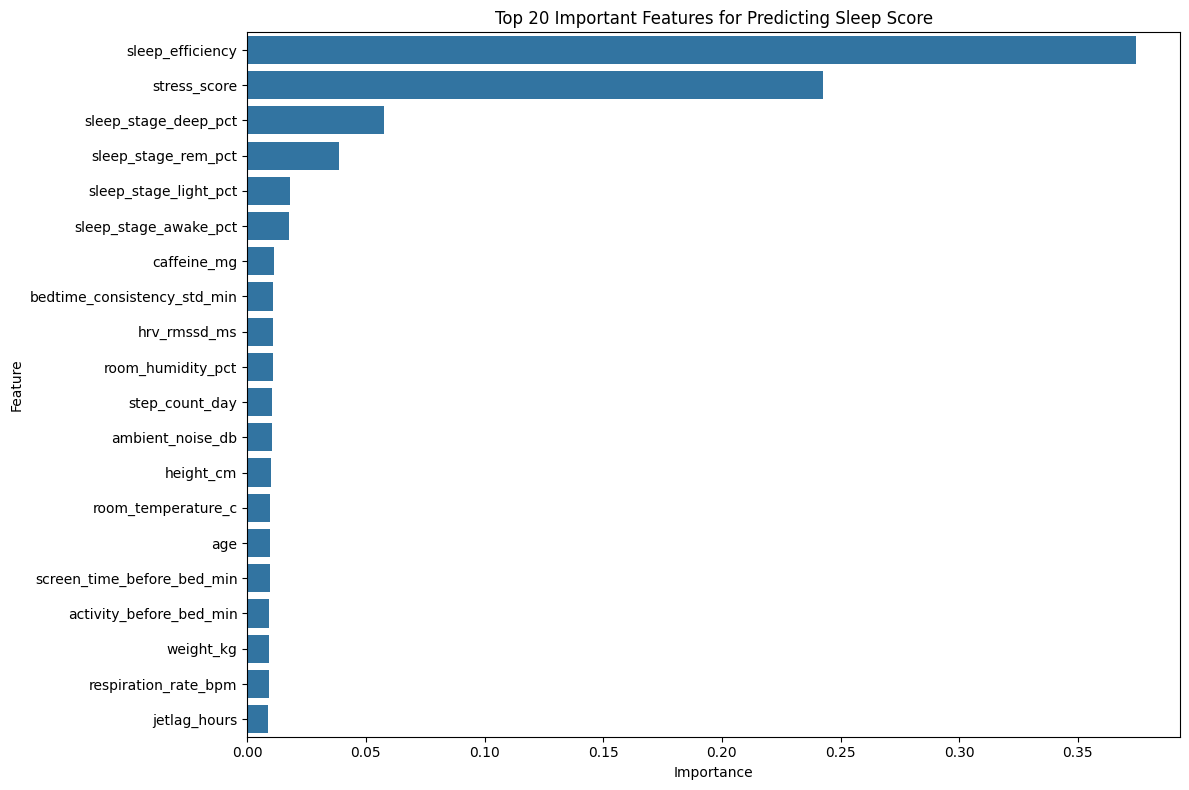

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get importance
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20))
plt.title("Top 20 Important Features for Predicting Sleep Score")
plt.tight_layout()
plt.show()


In [44]:
top_features = importance_df["Feature"].head(20).tolist()

df_filtered = df[top_features + ['sleep_score_raw']]  # Keep only top features + target

# Save it
df_filtered.to_csv("../data/processed/smartwatch_top_features.csv", index=False)
print("✅ Saved top feature dataset.")


✅ Saved top feature dataset.


In [42]:
import os
print(os.getcwd())

/Users/rutujashingate/Desktop/sleep-ml-project/notebooks
